In [1]:
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv("../clean_dataset.csv")

In [3]:
data.shape

(50000, 2)

In [4]:
data.head()

,text,label
0,i rented i am curious yellow video store contr...,0
1,i am curious yellow risible pretentious steami...,0
2,if avoid making type film future this film int...,0
3,this film probably inspired godard masculin fé...,0
4,oh brother hearing ridiculous film umpteen yea...,0


In [5]:
data.tail()

,text,label
49995,just got around seeing monster man yesterday i...,1
49996,i got part competition prize i watched really ...,1
49997,i got monster man box set three films i mainly...,1
49998,five minutes started feel naff looking got com...,1
49999,i caught movie sci fi channel recently it actu...,1


In [6]:
data["label"].value_counts()

label
0    25000
1    25000
Name: count, dtype: int64

In [7]:
data.head()

,text,label
0,i rented i am curious yellow video store contr...,0
1,i am curious yellow risible pretentious steami...,0
2,if avoid making type film future this film int...,0
3,this film probably inspired godard masculin fé...,0
4,oh brother hearing ridiculous film umpteen yea...,0


In [8]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data["label"])

In [9]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


**Data Preprocessing**

In [10]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["text"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["text"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["text"]), maxlen=200)

In [11]:
print(X_train)

[[   0    0    0 ... 1289   14    9]
 [   0    0    0 ...  568    5  757]
 [   0    0    0 ...  319    9    5]
 ...
 [   0    0    0 ...   17  997 1545]
 [   0    0    0 ...  287  366  196]
 [   0    0    0 ...   61   80 2897]]


In [12]:
print(X_test)

[[   0    0    0 ... 1537  306  707]
 [   0    0    0 ...  366  196   10]
 [   0    0    0 ...  369   22    9]
 ...
 [   0    0    0 ...  244   10    5]
 [   0    0    0 ...  170   64  572]
 [   0    0    0 ...   81  262 1652]]


In [13]:
Y_train = train_data["label"]
Y_test = test_data["label"]

In [14]:
print(Y_train)

48903    1
10174    0
34019    0
9815     0
6895     0
        ..
40542    1
11522    0
36243    0
30299    0
26224    0
Name: label, Length: 40000, dtype: int64


**LSTM - Long Short-Term Memory**

In [15]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/Users/geko/unibo/nlp/project/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Training the Model**

In [18]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 112s 223ms/step - accuracy: 0.7565 - loss: 0.4836 - val_accuracy: 0.8702 - val_loss: 0.3148
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 259ms/step - accuracy: 0.8864 - loss: 0.2844 - val_accuracy: 0.8780 - val_loss: 0.2985
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 127s 254ms/step - accuracy: 0.9092 - loss: 0.2377 - val_accuracy: 0.8826 - val_loss: 0.2919
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 287ms/step - accuracy: 0.9179 - loss: 0.2126 - val_accuracy: 0.8696 - val_loss: 0.3628
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 156s 312ms/step - accuracy: 0.9261 - loss: 0.1941 - val_accuracy: 0.8775 - val_loss: 0.3114


**Model Evaluation**

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.8790 - loss: 0.3098
Test Loss: 0.3060149848461151
Test Accuracy: 0.8788999915122986


**Building a Predictive System**

In [20]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [21]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
The sentiment of the review is: positive


In [22]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The sentiment of the review is: negative


In [23]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The sentiment of the review is: negative


313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step
Accuracy:  0.8789
Precision: 0.8792
Recall:    0.8789
F1 Score:  0.8789


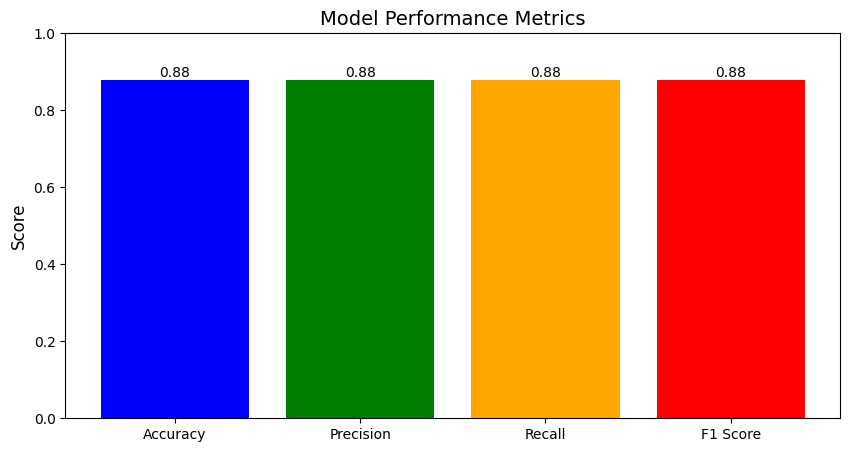

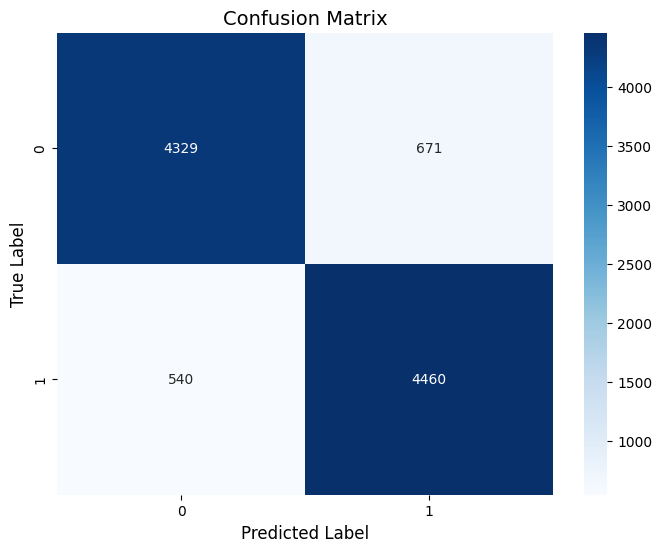

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix)

# Generate predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
if y_pred.shape[-1] > 1:  # Multi-class classification
  y_pred_labels = np.argmax(y_pred, axis=1)
  y_true_labels = np.argmax(Y_test, axis=1)
else:  # Binary classification
  y_pred_labels = (y_pred > 0.5).astype(int).squeeze()
  y_true_labels = Y_test.squeeze()

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Plot metrics
plt.figure(figsize=(10, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2., height,
    f'{height:.2f}',
    ha='center', va='bottom')

plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
  xticklabels=np.unique(y_true_labels), 
  yticklabels=np.unique(y_true_labels))
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Usage example:
# plot_metrics_and_confusion_matrix(model, X_test, Y_test)